# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

## Simulate the quadrotor using MPC as the controller


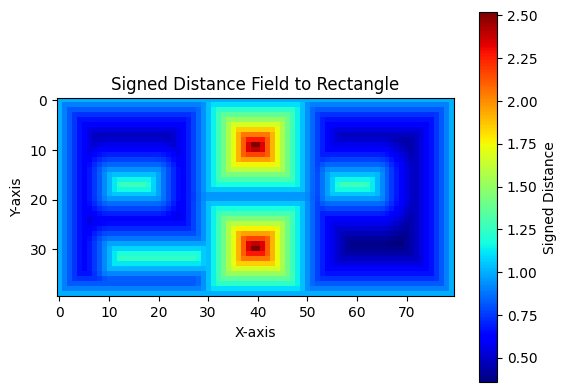

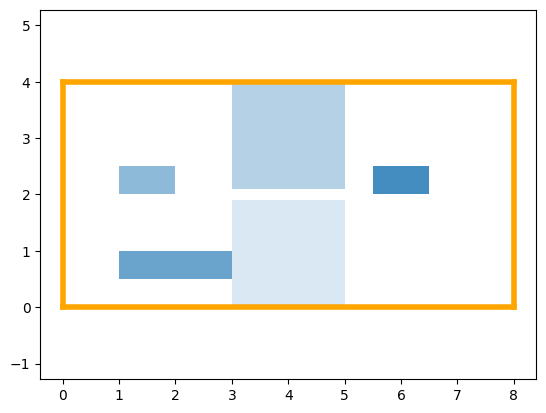

In [1]:
import torch
from lqrrt import PathPlannerLQRRT

from quadrotor import QuadrotorPendulum
from animation import Animation

from world import SignedDistanceField
import matplotlib.pyplot as plt

import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
tf = 10

# Construct our quadrotor controller 
x0 = np.array([2, 3, 0, 0, 0, 0, 0, 0])
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
sdf = SignedDistanceField("./configs/world_complex.yaml", gamma=1)

with torch.no_grad():
    sdf.plot_barrier()

sdf.plot_obs(plt.gca())
plt.axis('equal')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc24b42c-2384-48c3-b1e2-6f6c0205f5f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [1]:
import torch
from lqrrt import PathPlannerLQRRT

from quadrotor import QuadrotorPendulum
from animation import Animation

from world import SignedDistanceField
import matplotlib.pyplot as plt

import numpy as np

R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
sdf = SignedDistanceField("./configs/world.yaml", gamma=1)

rrt = PathPlannerLQRRT("./configs/lqrrt.yaml", quadrotor, sdf)
planner = rrt.get_planner()
x, u = rrt.get_trajectory(planner)

anime = Animation(quadrotor, sdf)
anime.set_trajectory(x)
anime.animate()


...planning...
Found plan at elapsed time: 1.766939 s
Tree size: 5
ETA: 63.25 s
lqr success rate: 50.00%


In [2]:
anime = Animation(quadrotor, sdf)
anime.set_trajectory(np.array(planner.x_seq))
anime.animate()

(1265, 8)
tensor(39376.9922)
cost: 39376.9921875


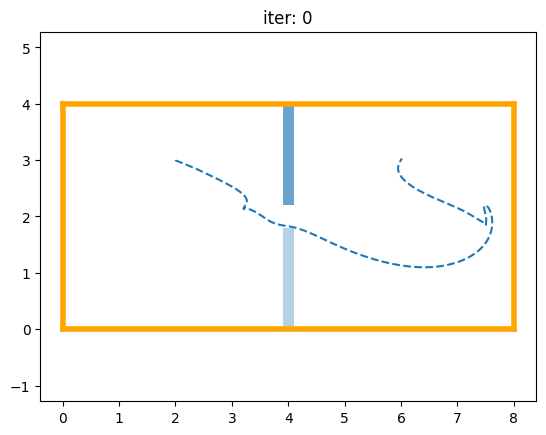

In [3]:
from ilqr import iLQR

print(x.shape)
ilqr = iLQR("./configs/ilqr.yaml", rrt)
ilqr.calculate_optimal_trajectory(u, rrt.dt)

In [ ]:
anime = Animation(quadrotor, sdf)
anime.set_trajectory(x)
anime.animate()